In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv


In [18]:
df = pd.read_csv("/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [20]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


Text(0.5, 1.0, 'Distribution of Gender')

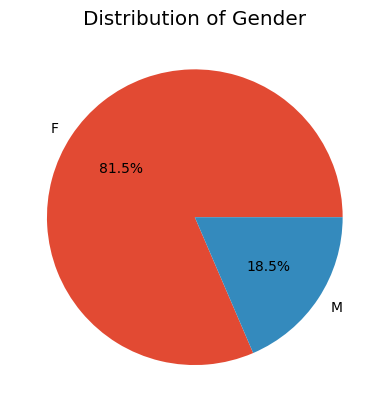

In [21]:
df.Gender.value_counts().plot.pie(autopct='%.1f%%',ylabel='')
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Distribution of Ages')

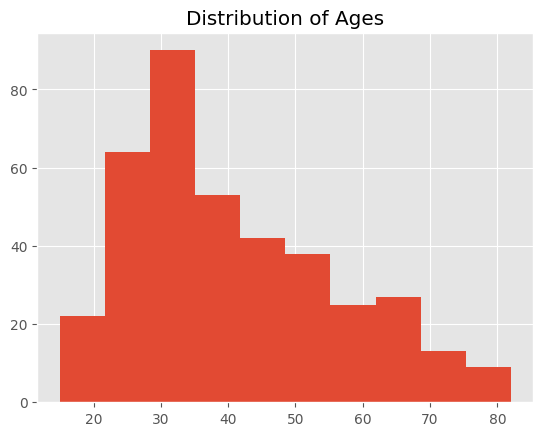

In [22]:
plt.style.use('ggplot')
df.Age.hist()
plt.title('Distribution of Ages')

In [23]:
minn = df.Age.min()
maxx = df.Age.max()
bins = [minn,30,50,maxx]
labels = ['Young','Middle-Age','Old']
df['Age_category'] = pd.cut(df.Age,bins=bins,labels=labels)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Distribution of Age-Category')

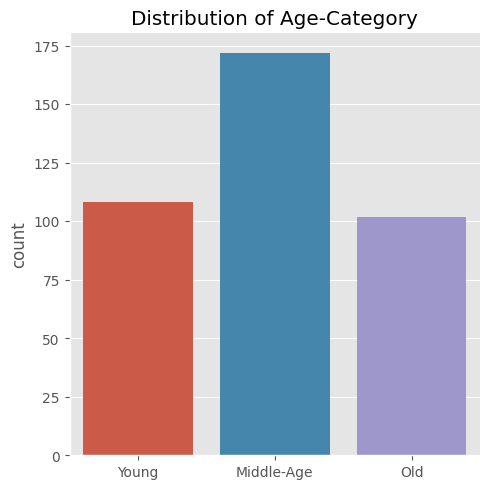

In [24]:
sns.catplot(data=df,x='Age_category', kind='count')
plt.xlabel('')
plt.title('Distribution of Age-Category')

In [25]:
(pd.crosstab(df.Smoking,df.Gender)/df.shape[0])*100

Gender,F,M
Smoking,,
No,79.112272,8.093995
Yes,2.349869,10.443864


In [26]:
from scipy.stats import chi2_contingency
chi2,pval,_,_ = chi2_contingency(pd.crosstab(df.Smoking,df.Gender))
pval

4.879371450505579e-33

There is an association between Smoking and Gender

In [29]:
chi2,pval,_,_ = chi2_contingency(pd.crosstab(df.Smoking,df.Risk))
pval

7.102463005016532e-15

Smoking seems to have an influence on risk

In [28]:
chi2,pval,_,_ = chi2_contingency(pd.crosstab(df.Smoking,df.Stage))
pval

8.347624466513779e-17

Smoking seems to have an influence on the stage of the disease.